In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
arrest = pd.read_csv("arrests.csv")

In [13]:
def large(x):
    return x["RACE"].count() > 1150
mostarrest = arrest.groupby("INCIDENTNEIGHBORHOOD").filter(large)
finalarrest = mostarrest.groupby("INCIDENTNEIGHBORHOOD")["GENDER"].count()
finalarrest.head(10)

INCIDENTNEIGHBORHOOD
Bluff                        1219
Carrick                      1960
Central Business District    3313
East Allegheny               1771
East Liberty                 1532
Homewood North               1642
Homewood South               1742
Marshall-Shadeland           1253
Mount Washington             1187
South Side Flats             2840
Name: GENDER, dtype: int64

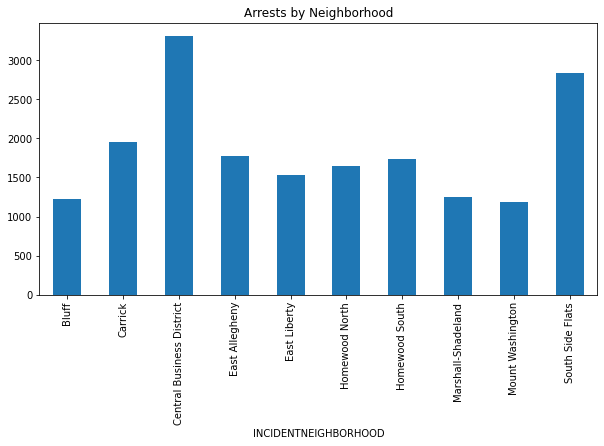

In [31]:
finalarrest.plot.bar(title="Arrests by Neighborhood", figsize=(10,5))
